In [19]:

%load_ext autoreload
%autoreload 2
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import numpy as np
from get_homography import *
from stitch3 import *
import sys
sys.path.append('gradient_blending')



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
img1=cv2.imread('images/mountain-left.jpg')
img2=cv2.imread('images/mountain-middle.jpg')
img3=cv2.imread('images/mountain-right.jpg')
# img1=cv2.imread('images/firewatch-left.jpg')
# img2=cv2.imread('images/firewatch-middle.jpg')
# img3=cv2.imread('images/firewatch-right.jpg')
# img1=cv2.imread('images/small-left.jpg')
# img2=cv2.imread('images/small-middle.jpg')
# img3=cv2.imread('images/small-right.jpg')
# img1=cv2.imread('images/web-left.jpg')
# img2=cv2.imread('images/web-middle.jpg')
# img3=cv2.imread('images/web-right.jpg')

HLM = get_homography(img1,img2)
HMR = get_homography(img2,img3)

5459
5468
Rmax1.4142135623730951
(513,)
(493,)
MaxInlierCount493
Final H[[ 1.12909264e+00 -5.56372045e-02 -1.64843921e+02]
 [ 1.10443578e-01  1.07881676e+00 -3.75215628e+00]
 [ 3.59726231e-04 -5.63115110e-05  1.00000000e+00]]
5468
5799
Rmax1.4142135623730951
(1219,)
(1213,)
MaxInlierCount1213
Final H[[ 1.12140606e+00 -1.22075472e-02 -1.53065922e+02]
 [ 6.17081019e-02  1.07183965e+00  8.10558878e+00]
 [ 3.30229264e-04 -4.86758456e-05  1.00000000e+00]]


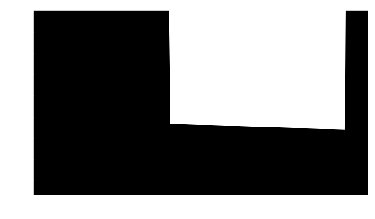

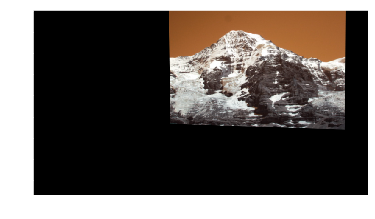

True

In [28]:
canvas,poisson = stitch3(img1,img2,img3,HLM,HMR)

cv2.imwrite("res.png",canvas)
cv2.imwrite("poison.png",poisson)

In [22]:
Sclahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
canvas[:,:,0] = clahe.apply(canvas[:,:,0])
canvas[:,:,1] = clahe.apply(canvas[:,:,1])
canvas[:,:,2] = clahe.apply(canvas[:,:,2])
# canvas[:,:,0] = cv2.equalizeHist(canvas[:,:,0])
# canvas[:,:,1] = cv2.equalizeHist(canvas[:,:,1])
# canvas[:,:,2] = cv2.equalizeHist(canvas[:,:,2])

error: OpenCV(3.4.2) /io/opencv/modules/imgproc/src/clahe.cpp:351: error: (-215:Assertion failed) _src.type() == (((0) & ((1 << 3) - 1)) + (((1)-1) << 3)) || _src.type() == (((2) & ((1 << 3) - 1)) + (((1)-1) << 3)) in function 'apply'
